In [1]:
CIFAR_DIR = 'cifar-10-batches-py/'

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [3]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

In [4]:
all_data = [0,1,2,3,4,5,6]

In [5]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [6]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [7]:
test_batch[b'data']
test_batch[b'labels']

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [8]:
data_batch1.keys()

dict_keys([b'labels', b'data', b'batch_label', b'filenames'])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
X = data_batch1[b'data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

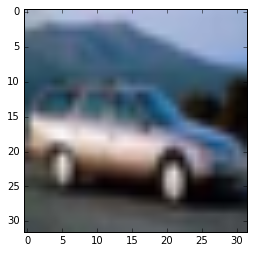

In [11]:
plt.imshow(X[4])

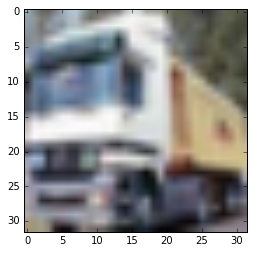

In [12]:
plt.imshow(X[1])

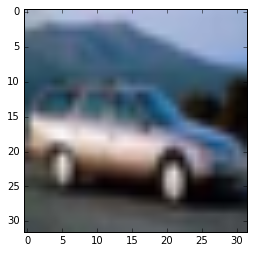

In [13]:
plt.imshow(X[4])

In [14]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [15]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        # Grabs a list of all the data batches for training
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        # Grabs a list of all the test batches (really just one batch)
        self.test_batch = [test_batch]
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        # Vertically stacks the training images
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        # Reshapes and normalizes training images
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [101]:
labels = ["Airplane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [16]:
ch = CifarHelper()
ch.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [17]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [18]:
x = tf.placeholder(tf.float32,shape=[None,32,32,3])
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [19]:
hold_prob = tf.placeholder(tf.float32)

In [20]:
#Helper Function

#init weights
def init_weights(shape):
    init_random_distribution = tf.truncated_normal(shape,mean=0,stddev=0.1)
    return tf.Variable(init_random_distribution)

#init bias
def init_bias(shape):
    init_bias_value = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_value)

#conv2d
def conv2d(x,W):
    #x -- > [batch,H,W,channels]
    #W -- > [filter H, filter W, Channels In, Channels Out]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

#pooling
def max_pool_2by2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

#convolutional layer
def convolutional_layer(input_x,shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

#fully connected layer
def normal_full_layer(input_layer,size):
    return tf.contrib.layers.fully_connected(input_layer, size, activation_fn=None)

In [21]:
convo_1 = convolutional_layer(x,shape=[4,4,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [46]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling = max_pool_2by2(convo_2)


convo_3 = convolutional_layer(convo_2_pooling,shape=[5,5,64,128])
convo_3_pooling = max_pool_2by2(convo_3)

convo_4 = convolutional_layer(convo_3_pooling,shape=[5,5,128,256])
convo_4_pooling = max_pool_2by2(convo_4)

In [47]:
convo_2_flat = tf.contrib.layers.flatten(convo_4_pooling)

In [48]:
hold_prob = tf.placeholder(tf.float32)

In [49]:
full_layer_one = tf.contrib.layers.fully_connected(convo_2_flat, 128, activation_fn=None)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)
full1 = tf.layers.batch_normalization(full_one_dropout)

In [50]:
full_layer_two = tf.contrib.layers.fully_connected(full1, 256, activation_fn=None)
full_two_dropout = tf.nn.dropout(full_layer_two,keep_prob=hold_prob)
full2 = tf.layers.batch_normalization(full_two_dropout)

In [51]:
full_layer_three = tf.contrib.layers.fully_connected(full2, 512, activation_fn=None)
full_three_dropout = tf.nn.dropout(full_layer_three,keep_prob=hold_prob)
full3 = tf.layers.batch_normalization(full_three_dropout)

In [52]:
full_layer_four = tf.contrib.layers.fully_connected(full3, 1024, activation_fn=None)
full_four_dropout = tf.nn.dropout(full_layer_four,keep_prob=hold_prob)
full4 = tf.layers.batch_normalization(full_four_dropout)

In [53]:
y_pred = tf.contrib.layers.fully_connected(full3, 10, activation_fn=None)


In [54]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [55]:
train=tf.train.AdamOptimizer(learning_rate=0.0004).minimize(cross_entropy)

In [56]:
init = tf.global_variables_initializer()

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


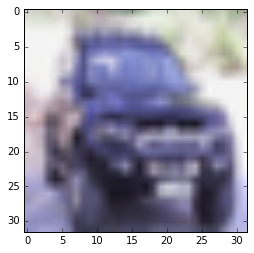

In [57]:
plt.imshow(ch.test_images[9])
set = ch.test_images[9].reshape(1,32,32,3)
set_label = ch.test_labels[9].reshape(1,10)
print(set_label)
val = tf.placeholder(tf.float32,shape=[None,10])

In [37]:
# steps = 210
# with tf.Session() as sess:
#     sess.run(init)
#     for i in range(steps):
#         batch = ch.next_batch(100)
#         sess.run(train,feed_dict={x:batch[0],y_true:batch[1],hold_prob:0.7})
#         if i%100 == 0:
#             print("On Step: {}".format(i))
#             print("Acc:")
#             matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
#             acc = tf.reduce_mean(tf.cast(matches,tf.float32))
#             print(sess.run(acc,feed_dict={x:set,y_true:set_label,hold_prob:1.0}))
#             print(tf.argmax(sess.run(y_pred,feed_dict={x:set,y_true:set_label,hold_prob:1.0}),1).eval())
#             print("\n")

In [61]:
steps = 5000
sess=tf.InteractiveSession()
sess.run(init)
for i in range(steps):
    batch = ch.next_batch(100)
    sess.run(train,feed_dict={x:batch[0],y_true:batch[1],hold_prob:0.7})
    print(i)
#     if i%100 == 0:
#         print("On Step: {}".format(i))
#         print("Acc:")
#         matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
#         acc = tf.reduce_mean(tf.cast(matches,tf.float32))
#         print(sess.run(acc,feed_dict={x:set,y_true:set_label,hold_prob:1.0}))
#             print(tf.argmax(sess.run(y_pred,feed_dict={x:set,y_true:set_label,hold_prob:1.0}),1).eval())
#             print("\n")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [64]:
print("Acc:")
matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(matches,tf.float32))
print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:0.9}))

Acc: 0.83


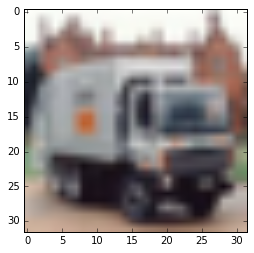

In [186]:
img_index = 11
plt.imshow(ch.test_images[img_index ])

In [187]:
set = ch.test_images[img_index ].reshape(1,32,32,3)
set_label = ch.test_labels[img_index ].reshape(1,10)
#val = tf.placeholder(tf.float32,shape=[None,10])
# print("Acc:")
# matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
# acc = tf.reduce_mean(tf.cast(matches,tf.float32))
# print(sess.run(acc,feed_dict={x:set,y_true:set_label,hold_prob:1.0}))
print("Prediction:")
a = int(tf.argmax(sess.run(y_pred,feed_dict={x:set,y_true:set_label,hold_prob:1.0}),1).eval())
print(labels[a])

Prediction:
Truck


Input Image


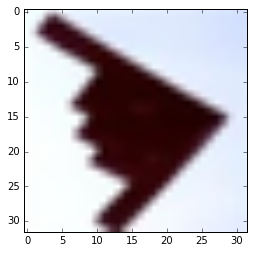

In [193]:
print("Input Image")
img_index = 9482
plt.imshow(ch.test_images[img_index ])

In [194]:
set = ch.test_images[img_index ].reshape(1,32,32,3)
set_label = ch.test_labels[img_index ].reshape(1,10)
print("Prediction:")
a = int(tf.argmax(sess.run(y_pred,feed_dict={x:set,y_true:set_label,hold_prob:1.0}),1).eval())
print(labels[a])

Prediction:
Airplane
